<a href="https://colab.research.google.com/github/SasidharaSrivatchasa/X-ray-Classification/blob/main/PRAICP_1012_Pneumonia_chest_x_ray_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#Importing all the required libraries for building an training the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# Defining Dataset Paths for already saparated data in the dataset(Train, Test, Validation)
train_dir = "/content/drive/MyDrive/MY PROJECTS ON MACHINE LEARNING AND AI/INTERNSHIP PROJECTS /CAPSTONE PROJECTS/PROJECT 4 (PRAICP-1012-Pneumonia chest x-ray classification2)/Data/Chest-Xray-2/chest_xray/train"
val_dir = "/content/drive/MyDrive/MY PROJECTS ON MACHINE LEARNING AND AI/INTERNSHIP PROJECTS /CAPSTONE PROJECTS/PROJECT 4 (PRAICP-1012-Pneumonia chest x-ray classification2)/Data/Chest-Xray-2/chest_xray/val"
test_dir = "/content/drive/MyDrive/MY PROJECTS ON MACHINE LEARNING AND AI/INTERNSHIP PROJECTS /CAPSTONE PROJECTS/PROJECT 4 (PRAICP-1012-Pneumonia chest x-ray classification2)/Data/Chest-Xray-2/chest_xray/train"

In [42]:
# Load Data Using ImageDataGenerator
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

In [43]:
datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values


In [44]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # No need to shuffle test data
)

print("Data Loaded Successfully!")


Found 5226 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5226 images belonging to 2 classes.
Data Loaded Successfully!


In [45]:
# Building CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (Normal/Pneumonia)
])


In [46]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
#Training the Model
EPOCHS = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.8293 - loss: 0.3858 - val_accuracy: 0.6875 - val_loss: 0.5417
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.9627 - loss: 0.1152 - val_accuracy: 0.9375 - val_loss: 0.1428
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.9663 - loss: 0.1060 - val_accuracy: 0.8750 - val_loss: 0.2562
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.9713 - loss: 0.0826 - val_accuracy: 0.8750 - val_loss: 0.2008
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.9794 - loss: 0.0599 - val_accuracy: 0.9375 - val_loss: 0.1229
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.9807 - loss: 0.0526 - val_accuracy: 0.8750 - val_loss: 0.2370
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.9852 - loss: 0.0442 - val_accuracy: 0.8125 - val_loss: 0.4249
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.9875 - loss: 0.0384 - val_accu

In [49]:
# Saving the model in the drive
model.save('/content/drive/MyDrive/MY PROJECTS ON MACHINE LEARNING AND AI/INTERNSHIP PROJECTS /CAPSTONE PROJECTS/PROJECT 4 (PRAICP-1012-Pneumonia chest x-ray classification2)/PROJECT 4 (PRAICP-1012-Pneumonia chest x-ray classification2)/Pneumonia_Chest_Xray_Model.h5')
print("Model saved successfully!")

Model saved successfully!


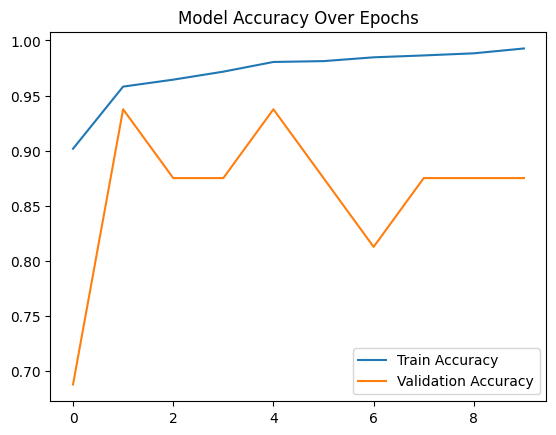

In [50]:

# Ploting Training Performance
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()

In [ ]:
# Loading & Test Model
def predict_xray(image_path, model):
    from tensorflow.keras.preprocessing import image
    import numpy as np

    img = image.load_img(image_path, target_size=IMG_SIZE)
    img = image.img_to_array(img)/255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    class_name = "Pneumonia" if prediction[0][0] > 0.5 else "Normal"
    return class_name

In [51]:
# usage
result = predict_xray('/content/drive/MyDrive/MY PROJECTS ON MACHINE LEARNING AND AI/INTERNSHIP PROJECTS /CAPSTONE PROJECTS/PROJECT 4 (PRAICP-1012-Pneumonia chest x-ray classification2)/Data/Chest-Xray-2/chest_xray/test/NORMAL/IM-0001-0001.jpeg', model)  #Testing with the test data from the dataset normal xray image
print("Predicted Class:", result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Predicted Class: Normal


In [52]:
# usage
result = predict_xray('/content/drive/MyDrive/MY PROJECTS ON MACHINE LEARNING AND AI/INTERNSHIP PROJECTS /CAPSTONE PROJECTS/PROJECT 4 (PRAICP-1012-Pneumonia chest x-ray classification2)/Data/Chest-Xray-2/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg', model)  #Testing with the test data from the dataset diseased xray image
print("Predicted Class:", result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Class: Pneumonia


In [54]:
# Get Training Accuracy
train_loss, train_acc = model.evaluate(train_generator)
print(f"Training Accuracy: {train_acc * 100:.2f}%")

# Get Validation Accuracy
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

# Get Test Accuracy
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


164/164 ━━━━━━━━━━━━━━━━━━━━ 116s 703ms/step - accuracy: 0.9948 - loss: 0.0159
Training Accuracy: 99.48%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.8750 - loss: 0.2845
Validation Accuracy: 87.50%


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 114s 695ms/step - accuracy: 0.9937 - loss: 0.0194
Test Accuracy: 99.48%


In [55]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {test_acc * 100:.2f}%")


164/164 ━━━━━━━━━━━━━━━━━━━━ 114s 692ms/step - accuracy: 0.9937 - loss: 0.0194
✅ Test Accuracy: 99.48%


164/164 ━━━━━━━━━━━━━━━━━━━━ 113s 688ms/step


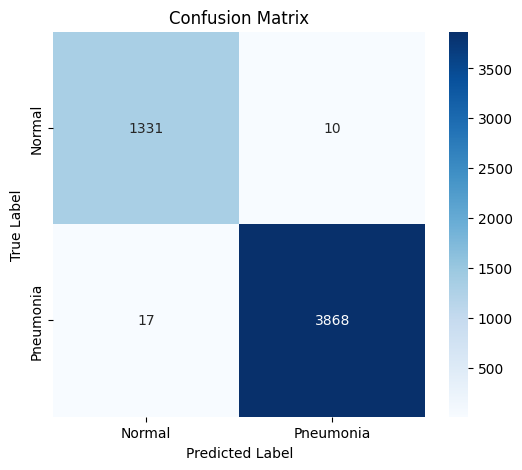

In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get True Labels & Predictions
true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.round(predictions).flatten()  # Convert probabilities to 0/1

# Generates Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
